In [1]:
import pandas as pd
from matplotlib import rcParams

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
event_f = 'data/001-1-02.lif'
df_event_info = pd.read_csv(event_f,  error_bad_lines=False, header=None)
df_race_data = pd.read_csv(event_f, skiprows=1, header=None)

b'Skipping line 2: expected 11 fields, saw 19\nSkipping line 3: expected 11 fields, saw 19\nSkipping line 4: expected 11 fields, saw 19\nSkipping line 5: expected 11 fields, saw 19\nSkipping line 6: expected 11 fields, saw 19\nSkipping line 7: expected 11 fields, saw 19\nSkipping line 8: expected 11 fields, saw 19\nSkipping line 9: expected 11 fields, saw 19\n'


In [4]:
event_info_columns = {
    0: 'event#',
    1: 'round#',
    2: 'heat#',
    3: 'eventName',
    4: 'wind',
    9: 'eventDistance',
    10: 'gunTime'     
}
event_info_column_names = list(event_info_columns.values())
df_event_info.rename(
    columns=event_info_columns,
    inplace=True

)

In [5]:
race_data_columns = {
    0: 'place',
    1: 'id',
    2: 'lane',
    3: 'lname',
    4: 'fname',
    5: 'affil',
    6: 'time',
    9: 'reaction'
}

race_data_column_names = list(race_data_columns.values())
df_race_data.rename(
    columns=race_data_columns,
    inplace=True
)

In [6]:
def try_round(x):
    try:
        return round(x, 2)
    except:
        return x

In [7]:
df_race_data['time'] = df_race_data['time'].apply(try_round)
df_race_data['time'].fillna('DQ', inplace=True)
df_race_data['lname'] = df_race_data['lname'].apply(lambda x: x.upper())
df_race_data['label'] = df_race_data['lname'] + ',' + df_race_data['affil']
df_race_data['reaction_rank'] = df_race_data['reaction'].rank(ascending=False)

In [8]:
df_race_data

,place,id,lane,lname,fname,affil,time,7,8,reaction,...,11,12,13,14,15,16,17,18,label,reaction_rank
0,1,368,1,BURKE,Mario,UH,10.09,NaN,10.10,0.301,...,17:53:44.312,M,1,NaN,10.10,10.10,9.91,NaN,"BURKE,UH",1.0
1,2,915,6,WEST,McKinely,SOMS,10.09,NaN,0.00,0.241,...,17:53:44.312,M,"1,2",NaN,0.00,0.00,9.91,NaN,"WEST,SOMS",2.0
2,3,105,5,BACON,Jaylen,ARST,10.1,NaN,0.00,0.156,...,17:53:44.312,M,"1,2",NaN,0.00,0.00,9.91,NaN,"BACON,ARST",5.0
3,4,1051,4,ODUDURU,Divine,TTU,10.12,NaN,0.02,0.123,...,17:53:44.312,M,"1,2",NaN,0.02,0.02,9.88,NaN,"ODUDURU,TTU",6.0
4,5,318,7,HARAWAY,Darryl,FSU,10.14,NaN,0.03,0.205,...,17:53:44.312,M,1,NaN,0.03,0.03,9.86,NaN,"HARAWAY,FSU",3.0
5,6,854,3,JEFFERSON,Chris,SHSU,10.17,NaN,0.02,0.108,...,17:53:44.312,M,1,NaN,0.02,0.02,9.84,NaN,"JEFFERSON,SHSU",7.0
6,7,700,8,LARKINS,Micah,NWST,10.17,NaN,0.01,0.189,...,17:53:44.312,M,1,NaN,0.01,0.01,9.83,NaN,"LARKINS,NWST",4.0
7,DQ,108,2,ROSS,Elijah,ARST,DQ,NaN,0.16,0.091,...,17:53:44.312,M,1,NaN,0.16,0.16,9.68,NaN,"ROSS,ARST",8.0


In [9]:
limit=0.10
def set_color(x):
    if x < limit:
        return '#9B2335'
    else:
        return '#F0C05A'
    
df_race_data['color'] = df_race_data['reaction'].apply(set_color)

In [10]:
df_race_data.sort_values(by='place', inplace=True, ascending=False)
event_name = df_event_info['eventName'].iloc[0]
ax = df_race_data.plot(
    kind='barh',
    x='label',
    y='reaction',
    color=df_race_data['color'],
    figsize=(18,10.1),
    fontsize=16,
    title='{} Reaction Times Sorted by Finish Order'.format(event_name))

ax.get_legend().remove()
ranks = list(df_race_data['reaction_rank'])[::-1]
times = list(df_race_data['time'])
for i in range(8):
    # I messed with these values until I found something that looked nice 
    rank_width_offset = 0.0050
    rank_height_offset = 0.050
    time_width_offset = 0.0025
    time_height_offset = 0.050
    ax.text(rank_width_offset, i - rank_height_offset, int(ranks[i]))
    ax.text(ax.patches[i].get_width() + time_width_offset, i - time_height_offset, times[i])
    
ax.set_ylabel("")
ax.title.set_size(20)
fig = ax.get_figure()
fig.savefig('data/images/{}-plot.pdf'.format(event_name))
# ax.set_facecolor('black')

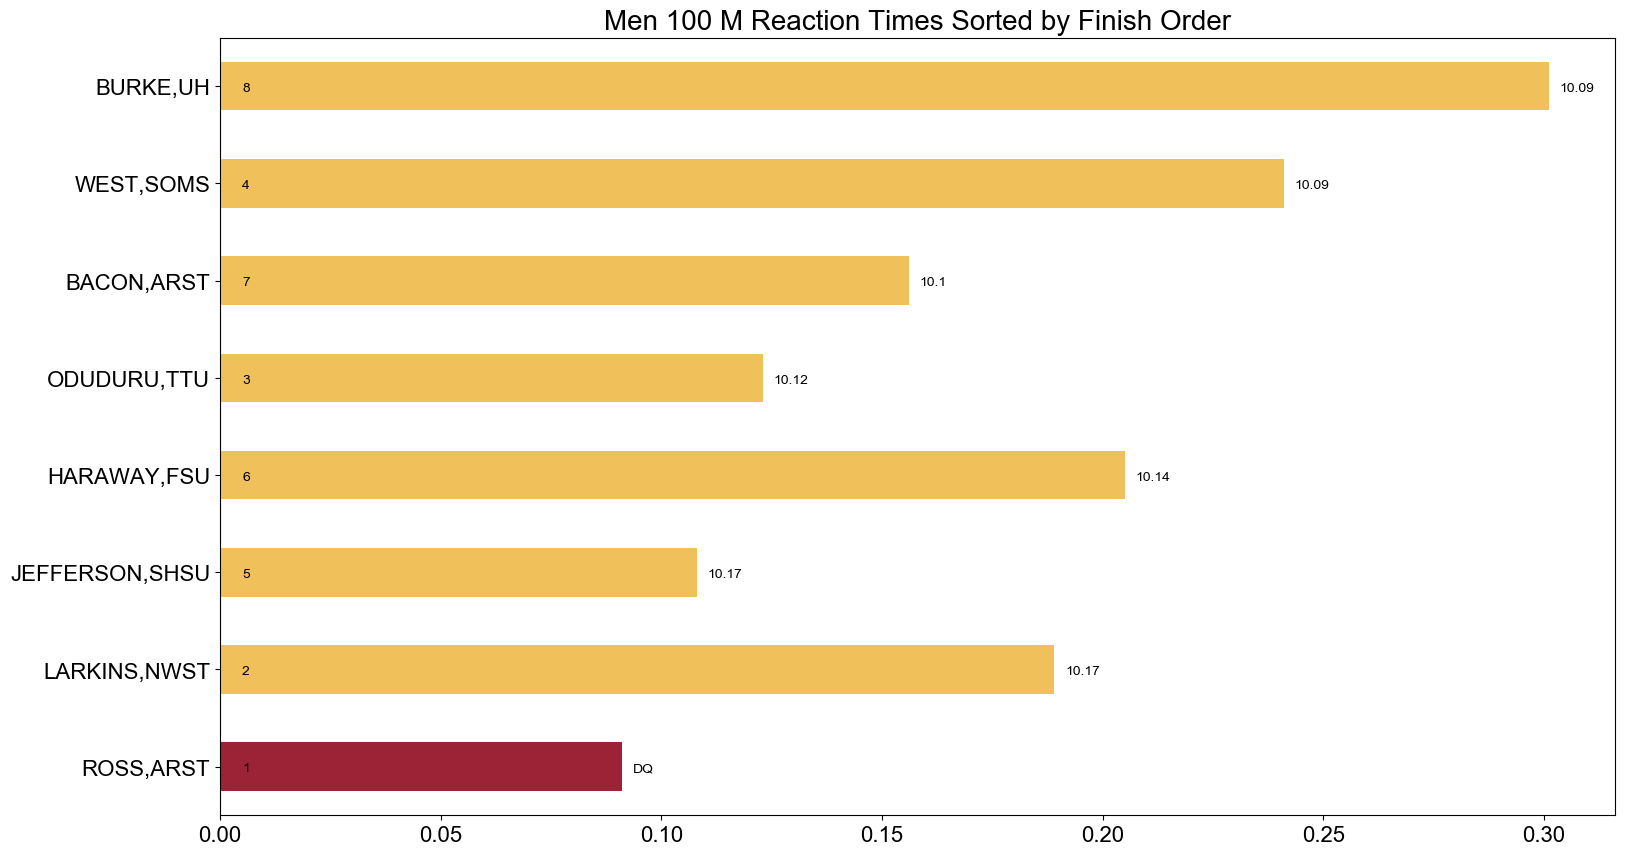

In [11]:
fig